In [ ]:
import os
from dotenv import load_dotenv

load_dotenv("env.env")



In [5]:
def match_predictions_to_ground_truth(ground_truth, predictions):
    """
    To match prediction vs GT, we use UNIT and VALUE keys.
    """
    matched_pairs = []
    
    for pred in predictions:
        pred_value = pred['value']
        pred_unit = pred['unit']
        
        for gt in ground_truth:
            gt_value = gt['value']
            gt_unit = gt['unit']
            
            if pred_value == gt_value and pred_unit == gt_unit:
                matched_pairs.append((gt, pred))
                break
    
    return matched_pairs


In [7]:
extract_numbers("0.5 to 1")

NameError: name 'extract_numbers' is not defined

In [6]:
# import Levenshtein
import re
import ast
import string 

def extract_numbers(string):
    
    string = string.replace("-", " ")
    pattern = r'-?\d+(?:\.\d+)?'
    float_numbers = re.findall(pattern, string)
    float_numbers = [float(num) for num in float_numbers]
                     
    return float_numbers

# def evaluate_measurements_extraction(ground_truth, predictions, similarity_threshold=0.7):
#     """
#     Evaluates the measurements extraction model by comparing the predicted measurements to the ground truth measurements.
    
#     Args:
#         ground_truth (list): List of dictionaries representing the ground truth measurements.
#             Each dictionary should contain 'measurment', 'unit', and 'value' keys.
#         predictions (list): List of dictionaries representing the predicted measurements.
#             Each dictionary should contain 'measurment', 'unit', and 'value' keys.
#         similarity_threshold (float, optional): Similarity threshold for matching measurements based on the Levenshtein distance.
#             Defaults to 0.8.
    
#     Returns:
#         float: Precision, the proportion of correctly predicted measurements out of all predicted measurements.
#         float: Recall, the proportion of correctly predicted measurements out of all ground truth measurements.
#         float: F1-score, the harmonic mean of precision and recall.
#     """
#     true_positives = 0
#     false_positives = 0
#     false_negatives = 0
#     errors = []
#     for pred in predictions:
#         pred_measurement = pred['measurement']
#         pred_unit = pred['unit'].replace("-", " ").replace("to", " ")
#         pred_value = extract_numbers(pred['value'])
        
        
#         found_match = False
        
#         for gt in ground_truth:
#             gt_measurement = gt['measurement']
#             gt_unit = gt['unit'].replace("-", " ").replace("to", " ")
#             gt_value = extract_numbers(gt['value'])
            
#             measurement_similarity = Levenshtein.ratio(pred_measurement.lower(), gt_measurement.lower())
            
#             if (
#                 (pred_measurement.lower() in gt_measurement.lower() or gt_measurement.lower() in pred_measurement.lower())
#                 and (gt_unit in pred_unit or pred_unit in gt_unit)
#                 and pred_value == gt_value
#             ):
#                 found_match = True
#                 break
# #             else:
# #                  if measurement_similarity < similarity_threshold:
# #                     errors.append(f"Measurments similarity under threshold, prediction: {pred_measurement}, groundtruth: {gt_measurement}")
# #                  if not (gt_unit in pred_unit or pred_unit in gt_unit):
# #                      errors.append(f"units missmatch, prediction: {pred_unit}, groundtruth: {gt_unit}")
# #                  if not pred_value == gt_value:
# #                      errors.append(f"Unis missmatch, prediction: {pred_value}, groundtruth: {gt_value}")
        
#         if found_match:
#             true_positives += 1
#         else:
#             false_positives += 1
    
#     false_negatives = len(ground_truth) - true_positives
    
#     precision = true_positives / (true_positives + false_positives)
#     recall = true_positives / (true_positives + false_negatives)
#     try:
#         f1_score = (2 * precision * recall) / (precision + recall)
#     except ZeroDivisionError:
#     # Handle division by zero error here
#         f1_score = 0    
    
#     evaluation_results = {
#         "precision": precision,
#         "recall": recall,
#         "f1_score": f1_score,
#         "true_positives": true_positives,
#         "errors": errors
#     }
#     return evaluation_results

    
def build_dict_from_json_string(json_str_list):
    try:
        fixed_json = json.loads(json_str_list)
        return fixed_json
    except json.JSONDecodeError as e:
        # Remove the surrounding square brackets and newlines
        clean_string = json_str_list.replace("'", "\"")

        # Safely evaluate the string as a list of dictionaries
        dictionary_list = ast.literal_eval(clean_string)
        
        return dictionary_list

In [7]:
from fuzzywuzzy import fuzz

fuzz.ratio('0.01-10', ['0.01to 10'])

60

In [18]:
# import fuzzywuzzy.process as fuzz_process
# from fuzzywuzzy import fuzz

# def evaluate_measurements_extraction(gt, pred):
    
#     evaluation_results = []
#     true_positives = 0
#     false_positives = 0
#     missing_prediction = 0
    
#     for pred_item in pred:
        
#         measurement = pred_item['measurement']
#         matching_gt_item, similarity = fuzz_process.extractOne(measurement, [gt_item['measurement'] for gt_item in gt])
#         pred_unit = pred_item['unit'].replace("-", " ").replace("to", " ")
#         pred_value = extract_numbers(pred_item['value'])
# #         print(matching_gt_item, pred_item, similarity)
        
#         if matching_gt_item:
#             matching_gt_items = [gt_item for gt_item in gt if gt_item['measurement'] == matching_gt_item]
            
#             for matching_gt_item in matching_gt_items:
            
#                 gt_measurement = matching_gt_item['measurement']
#                 gt_unit = matching_gt_item['unit'].replace("-", " ").replace("to", " ")
#                 gt_value = extract_numbers(matching_gt_item['value'])

#                 unit_match = (fuzz.ratio(gt_unit, pred_unit) > 0.8)
#                 value_match = gt_value == pred_value

#                 if similarity >= 70 and unit_match and value_match:
#                     evaluation_results.append({'measurement': measurement, 'match': True})
#                     true_positives +=1
#                 else:
#                     evaluation_results.append({'measurement': measurement, 'match': False})
#                     false_positives +=1
#             else:
#                 evaluation_results.append({'measurement': measurement, 'match': False})
#                 missing_prediction +=1
    
#     false_negatives = len(gt) - true_positives
    
#     precision = true_positives / (true_positives + false_positives)
#     recall = true_positives / (true_positives + false_negatives)
#     try:
#         f1_score = (2 * precision * recall) / (precision + recall)
#     except ZeroDivisionError:
#     # Handle division by zero error here
#         f1_score = 0    
    
#     evaluation_results.append({
#         "precision": precision,
#         "recall": recall,
#         "f1_score": f1_score,
#         "true_positives": true_positives,
#         "false_positives": false_positives,
#         "miss_predictions": false_negatives
#     })
    
#     return evaluation_results


In [14]:
'0.01-10'.replace("-", " ").replace("to", " ")

'0.01 10'

In [8]:
gt = [{'measurement': 'RCR-ready RNA/mRNA templates',
    'unit': 'ng - µg',
    'value': '0.01-10'},
   {'measurement': 'Isolated coronaviral RdRp/helicase',
    'unit': 'U (units)',
    'value': '0.1-50'}]

pred = [{'measurement': 'RCR-ready RNA/mRNA templates',
    'unit': 'ng to μg',
    'value': '0.01 to 10'},
   {'measurement': 'coronaviral RdRp/helicase',
    'unit': 'U',
    'value': '0.1 to 50'},
   {'measurement': 'rNTPs amount', 'unit': 'N/A', 'value': 'proper amount'}
   ]

evaluate_measurements_extraction(pred, gt)

NameError: name 'evaluate_measurements_extraction' is not defined

## Building prompts

In [9]:
from langchain.chat_models import ChatOpenAI, AzureChatOpenAI
from langchain import PromptTemplate, LLMChain
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema import AIMessage, HumanMessage, SystemMessage
import json


In [50]:
import html

class PromptBuilder:
    
    @classmethod
    def build_prombt_from_dir(cls, prompt_id):
        
        prompt = cls._load_prompt_from_json(prompt_id)
        examples = cls.load_examples_from_json(prompt_id)

        return build_few_shots_prombt(prompt, examples)
    
    @classmethod
    def build_few_shots_prombt(cls, prompt, examples):
        
        system_message = "You are a helpful assistant you extract measurements from research patent."
        system_message_prompt = SystemMessagePromptTemplate.from_template(system_message)

        first_message = HumanMessagePromptTemplate.from_template(prompt)

        final_prombt = [system_message_prompt, first_message]
        
        for example in examples:
            final_prombt.append(HumanMessagePromptTemplate.from_template(f"text: '''{example['text']}'''"))
            final_prombt.append(AIMessagePromptTemplate.from_template(format_dicts_to_string(example['measurements'])))

        final_prombt.append(HumanMessagePromptTemplate.from_template("\nOutput format:{output_format}:\n '''{input_text}'''"))

        return ChatPromptTemplate.from_messages(final_prombt)
    
    @classmethod
    def _load_examples_from_json(cls, prompt_id: str) -> list[dict]:
        
        fie_path = f"Prompts/{prompt_id}/examples.json"
        if os.path.exists(fie_path):
            with open() as file:
                data = file.read()

            return json.loads(html.unescape(data))
        
        return []
    
    
    @classmethod
    def _load_prompt_from_json(cls, prompt_id):

        with open(f"Prompts/{prompt_id}/prompt.json") as file:
            data = file.read()

        return json.loads(html.unescape(data))

    


In [11]:
def format_dicts_to_string(data_list):
    formatted_strings = []

    for data in data_list:
        formatted_string =  '''"measurement": "{measurement}", "unit": "{unit}", "value": "{value}"'''.format(**data)
        formatted_strings.append(formatted_string)

    result =  ',\n'.join(formatted_strings) 
    return result

In [34]:
prompt = PromptBuilder._load_prompt_from_json("000")

examples = PromptBuilder._load_examples_from_json("000")

PromptBuilder.build_few_shots_prombt(prompt["text"], examples)

## API  class (build on Langchain)

In [12]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os 

class BASFMeasurmentsBarser:
    
    def __init__(self, prompt, chunk_size=3000, chunk_overlap=0, logger=ParserLogger()):
        self.chunk_size = chunk_size
        self.chunk_overlap = chunk_overlap
        self.prompt = prompt
        
        self.BASE_URL = os.getenv("AZURE_OPENAI_ENDPOINT") 
        self.API_KEY = os.getenv("AZURE_OPENAI_KEY")
        self.DEPLOYMENT_NAME = 'gpt-35-turbo'
        self.logger = logger
        
    def build_chat_chain(self):
        
        try:
            self.logger.log_info(f"Initializing chat API..")
            self.chat_api = AzureChatOpenAI(
                openai_api_base=self.BASE_URL,
                openai_api_version="2023-03-15-preview",
                deployment_name=self.DEPLOYMENT_NAME,
                openai_api_key=self.API_KEY,
                openai_api_type="azure",
            )
            self.chain = LLMChain(llm=self.chat_api, prompt=self.prompt)
        except Exception as e:
            log_message = f"Failed to initialize chat API, error message: {e}"
            self.logger.log_warning(log_message)
             
            

    def _load_txt_and_split(self, file_path):
        
        self.logger.log_info(f"Loading file from {file_path}.")
        text_loader = TextLoader(file_path)
        text = text_loader.load()

        text_splitter = RecursiveCharacterTextSplitter(chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
        all_splits = text_splitter.split_documents(text)
        
        self.logger.log_info(f"File loaded and splitted into {len(all_splits)} chunks each with {self.chunk_size} size .")
        return all_splits
        
    def parse_txt_by_chunks(self, file_path, ouput_format):
        
        all_splits = self._load_txt_and_split(file_path)
        results_all_splits = []
        
        for chunk in all_splits:

            result = self.parse_text(input_text=chunk.page_content, ouput_format=ouput_format)
            results_all_splits.append(result)
            
        return results_all_splits
    
    def parse_text(self, input_text, output_format):
        
        try:
            self.logger.log_info(f"Sending {self.get_number_of_tokens(input_text)} tokens.")
            predictions = self.chain.run(input_text=input_text, output_format=output_format)
            
            return predictions
        except Exception as e:
            # Handle the exception and generate an error message
            error_message = f"An error occurred: input text{input_text}, Error: {e}"
            print(error_message)
            self.logger.log_warning(error_message)
            
            return error_message
        
    def get_number_of_tokens(self, prompt):
       return self.chat_api.get_num_tokens(prompt)

        
        
        

# Prompt Evaluation

For the prompt Evaluation, we need to put into consideration 3 main questions:

### Does the LLM (GPT) understand the provided examples (in case we provided any examples)?
	1- We use the examples in the prompts as inputs, and check whether GPT outputs the expected output or no.
	2- If GPT outputs the expected output, then everything is good for this part.
	3- If the output is different, it's is probably because of the prompt is not clear, and It needs to be rewritten.

### After we make sure that GPT understand our prompts and our Examples, how can we make sure GPT is not overfitting to the provided examples?
There will be a separate test set with carefully crafted Ground truth labels to evaluate the prompt. 
Note that, this evaluation is not meant only for the Prompt, but also for the preprocessing and postprocessing steps. 

It's mandatory to choose the test samples carefully to make sure they cover almost all possible scenarios.


In [35]:
# Logger 

import logging


class ParserLogger:
    def __init__(self, logging_file="logs.log"):
        # Create logger
        self.logger = logging.getLogger(__name__)
        self.logger.setLevel(logging.INFO)

        # Create file handler and set the logging level
        file_handler = logging.FileHandler(logging_file)
        file_handler.setLevel(logging.INFO)

        # Create formatter and add it to the file handler
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        file_handler.setFormatter(formatter)

        # Add the file handler to the logger
        self.logger.addHandler(file_handler)

    def log_info(self, message):
        self.logger.info(message)
    
    def log_test_result(self, input_text, predicitons, gt, score):
        self.logger.info(f"Input: {input_text}, Groundtruth: {gt}, score: {score}")

    def log_warning(self, message):
        self.logger.warning(message)
    

In [27]:
from json.decoder import JSONDecodeError
import html
import fuzzywuzzy.process as fuzz_process
from fuzzywuzzy import fuzz    
    
logger = ParserLogger("Prompts/000/logs.log")

class PromptEvaluator:
    
    def evaluate_prompt_context(self, prompt_id):
        """
        Evaluates how the the LLM understand the provided examples within the prompt (in case of few-shots prompting), 
        by using the example in the prompt as inputs then compare the predictions to the expected output.
        """
        prompt = PromptBuilder.build_prombt_from_dir(prompt_id)
        #Building input and GT lists
        groud_truth = []
        inputs = []
        for exmaple in prompt_examples:
            groud_truth.append(exmaple["measurements"])
            inputs.append(exmaple["text"])


        # Defining a parser
        measurments_barser = BASFMeasurmentsBarser(prompt)
        measurments_barser.build_chat_chain()

        output_format = prompt_instructions["output_format"]

        eval_results = []
        for input_text, gt in zip(inputs, groud_truth):
            
            predictions = html.unescape(measurments_barser.parse_text(input_text, output_format))

            try:
                predictions_json = build_dict_from_json_string(predictions)
                eval_resul = self.evaluate_measurements_extraction(predictions_json, gt)
                eval_results.append({
                    "input":input_text,
                    "ground_truth": gt,
                    "predictions": predictions_json,
                    "score": eval_resul

                })
            except JSONDecodeError as e:
                eval_results.append({
                    "input":input_text,
                    "ground_truth": gt,
                    "predictions": predictions,
                    "score": None,
                    "error": f"Output parsing error: {e.msg}"

                })
                logger.log_warning(f"Context Evaluation score it not perfect, output: {predictions}, ground_truth: {gt}, score: {eval_resul}")
                print(f"Context Evaluation score it not perfect, output: {predictions}, ground_truth: {gt}, score: {eval_resul}")
                

        self.analyze_evaluation_results(eval_results)
        # Let's add number of Tokens of the prompt
        eval_results[-1]["number_of_tokens"] = measurments_barser.get_number_of_tokens(prompt)
        write_json_objects_to_file(eval_results, f"prompts/{prompt_id}/context_evaluation_results.json")
        
        return eval_results

    
    def evaluate_model_with_testset(self, prompt_id):

        with open(f"Data/test_set.json") as file:
            data = file.read()

        test_data = json.loads(data)

        prompt = PromptBuilder.build_prombt_from_dir(prompt_id)

        measurments_barser = BASFMeasurmentsBarser(prompt)
        measurments_barser.build_chat_chain()

        output_format = prompt_instructions["output_format"]
        eval_results = []
        
        for sample in test_data:

            input_text = sample["text"]
            gt = sample["measurements"]

            predictions = html.unescape(measurments_barser.parse_text(input_text, output_format))

            try:
                predictions_json = build_dict_from_json_string(predictions)
                eval_resul = self.evaluate_measurements_extraction(predictions_json, gt)
                eval_results.append({
                    "input":input_text,
                    "ground_truth": gt,
                    "predictions": predictions_json,
                    "score": eval_resul

                })
            except JSONDecodeError as e:
                eval_results.append({
                    "input":input_text,
                    "ground_truth": gt,
                    "predictions": predictions,
        #             "score": eval_resul,
                    "error": f"Output parsing error: {e.msg}"

                })

        self.analyze_evaluation_results(eval_results)
        
        # Let's add number of Tokens of the prompt
        eval_results[-1]["number_of_tokens"] = measurments_barser.get_number_of_tokens(prompt)
        write_json_objects_to_file(eval_results, f"prompts/{prompt_id}/test_set_evaluation_results.json")
        
        return eval_results
    
        

    def evaluate_measurements_extraction(self, gt, pred):

        evaluation_results = []
        true_positives = 0
        false_positives = 0
        missing_predictions = 0

        for pred_item in pred:

            measurement = pred_item['measurement']
            matching_gt_item, similarity = fuzz_process.extractOne(measurement, [gt_item['measurement'] for gt_item in gt])
            pred_unit = pred_item['unit'].replace("-", " ").replace("to", " ")
            pred_value = extract_numbers(pred_item['value'])
    #         print(matching_gt_item, pred_item, similarity)

            if matching_gt_item:
                matching_gt_items = [gt_item for gt_item in gt if gt_item['measurement'] == matching_gt_item]

                for matching_gt_item in matching_gt_items:

                    gt_measurement = matching_gt_item['measurement']
                    gt_unit = matching_gt_item['unit'].replace("-", " ").replace("to", " ")
                    gt_value = extract_numbers(matching_gt_item['value'])

                    unit_match = (fuzz.ratio(gt_unit, pred_unit) > 0.8)
                    value_match = gt_value == pred_value

                    if similarity >= 70 and unit_match and value_match:
                        evaluation_results.append({'measurement': measurement, 'match': True})
                        true_positives +=1
            else:
                missing_predictions +=1



        false_predicted_samples = len(gt) - true_positives

        accuracy = true_positives / len(pred)

        evaluation_results.append({
            "true_predictions": true_positives,
            "accuracy": accuracy,
            "missing_predictions": missing_predictions,
            "false_predicted_samples": false_predicted_samples

        })

        return evaluation_results


    def analyze_evaluation_results(self, eval_results):

        total_overall_accuracy = 0
        total_true_predictions = 0
        total_miss_predictions = 0
        total_false_predictions = 0

        for result in eval_results:
            if result["score"]:
                total_overall_accuracy  += result["score"][-1]["accuracy"]
                total_true_predictions  += result["score"][-1]["true_predictions"]
                total_miss_predictions  += result["score"][-1]["missing_predictions"]
                total_false_predictions += result["score"][-1]["false_predicted_samples"]
            else:
                total_overall_accuracy  += 0
                total_true_predictions  += 0
                total_miss_predictions  += 0
                total_false_predictions += 1

        total_overall_accuracy /= len(eval_results)
        
        total_result = {}
        total_result["total_overall_accuracy"] = total_overall_accuracy
        total_result["total_true_predictions"] = total_true_predictions
        total_result["total_miss_predictions"] = total_miss_predictions
        total_result["total_false_predictions"] = total_false_predictions
        
        eval_results.append(total_result)
    

        
    

In [28]:
prompt_evaluator = PromptEvaluator()

eval_results = prompt_evaluator.evaluate_prompt_context("000")

In [36]:
import json

def write_json_objects_to_file(json_objects, file_path):
    """
    Writes a list of JSON objects to a file.
    
    Args:
        json_objects (list): List of JSON objects.
        file_path (str): File path to write the JSON objects to.
    """
    with open(file_path, 'w') as file:
        json.dump(json_objects, file)

In [37]:
write_json_objects_to_file(eval_results, "Prompts/000/context_evaluation.log")

In [30]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'ground_truth': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'uni

In [32]:
prompt_evaluator = PromptEvaluator()

test_set_eval_results = prompt_evaluator.evaluate_model_with_testset("000")

In [33]:

test_set_eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'ground_truth': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'uni

In [43]:
write_json_objects_to_file(eval_results, "Prompts/000/test_set_evaluation_results.json")

In [46]:
data = eval_results[0]["predictions"]

In [48]:
import pandas as pd 

In [49]:
# Convert JSON to pandas DataFrame
df = pd.DataFrame(data)

# Create a new Excel workbook
writer = pd.ExcelWriter('data_table.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Data', index=False)

# Save the workbook
writer.save()

C:\Users\cm_El\AppData\Local\Temp\ipykernel_3864\2975909368.py:9: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [57]:
eval_results[0]["score"]

[{'measurement': 'BET surface area', 'match': True},
 {'measurement': 'ceria crystal size', 'match': True},
 {'measurement': 'BaCO crystallite size', 'match': True},
 {'true_predictions': 3,
  'accuracy': 1.0,
  'missing_predictions': 0,
  'false_predicted_samples': 0}]

## Plot Results

In [39]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 19.5 MB/s eta 0:00:00
     ------------------------------------- 470.9/470.9 kB 28.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 1.9/1.9 MB 24.8 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


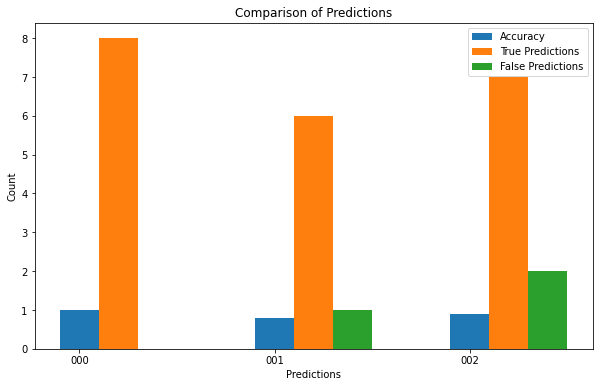

In [3]:
import matplotlib.pyplot as plt

# Results of multiple predictions
predictions = [
    { "prompt_id": "000",
        'total_overall_accuracy': 1.0,
        'total_true_predictions': 8,
        'total_miss_predictions': 0,
        'total_false_predictions': 0
    },
    { "prompt_id": "001",
        'total_overall_accuracy': 0.8,
        'total_true_predictions': 6,
        'total_miss_predictions': 1,
        'total_false_predictions': 1
    },
    { "prompt_id": "002",
        'total_overall_accuracy': 0.9,
        'total_true_predictions': 7,
        'total_miss_predictions': 0,
        'total_false_predictions': 2
    }
]

# Extracting values for plotting
accuracy = [result['total_overall_accuracy'] for result in predictions]
true_predictions = [result['total_true_predictions'] for result in predictions]
false_predictions = [result['total_false_predictions'] for result in predictions]

# Creating x-axis labels for each prediction
labels = [result["prompt_id"] for result in predictions]

# Plotting the results
plt.figure(figsize=(10, 6))
x = range(len(predictions))
plt.bar(x, accuracy, width=0.2, label='Accuracy')
plt.bar([i + 0.2 for i in x], true_predictions, width=0.2, label='True Predictions')
plt.bar([i + 0.4 for i in x], false_predictions, width=0.2, label='False Predictions')
plt.xlabel('Predictions')
plt.ylabel('Count')
plt.xticks(x, labels)
plt.legend()
plt.title('Comparison of Predictions')
plt.show()

In [4]:
import pandas as pd 

pd.DataFrame(predictions)

,prompt_id,total_overall_accuracy,total_true_predictions,total_miss_predictions,total_false_predictions
0,000,1.0,8,0,0
1,001,0.8,6,1,1
2,002,0.9,7,0,2


In [ ]:
import openpyxl


# Create a new Excel workbook
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write column headers
headers = ['Prediction', 'Accuracy', 'True Predictions', 'False Predictions']
for col_num, header in enumerate(headers, start=1):
    sheet.cell(row=1, column=col_num).value = header

# Write prediction results
for row_num, result in enumerate(predictions, start=2):
    sheet.cell(row=row_num, column=1).value = result['prompt_id']
    sheet.cell(row=row_num, column=2).value = result['total_overall_accuracy']
    sheet.cell(row=row_num, column=3).value = result['total_true_predictions']
    sheet.cell(row=row_num, column=4).value = result['total_false_predictions']

# Save the workbook
workbook.save('prediction_results.xlsx')

## Results Visualization

In [49]:
from json.decoder import JSONDecodeError
import html

with open(f"Data/test_set.json") as file:
    data = file.read()

test_data = json.loads(data)

prompt_id = "000"
prompt_instructions = PromptBuilder._load_prompt_from_json(prompt_id)

prompt_examples = PromptBuilder._load_examples_from_json(prompt_id)

prompt = PromptBuilder.build_few_shots_prombt(prompt_instructions["text"], prompt_examples)

measurments_barser = BASFMeasurmentsBarser(prompt)
measurments_barser.build_chat_chain()

output_format = prompt_instructions["output_format"]

eval_results = []
for sample in test_data[4::]:
    
    input_text = sample["text"]
    gt = sample["measurements"]
    
    predictions = html.unescape(measurments_barser.parse_text(input_text, output_format))
    
    try:
        eval_resul = evaluate_measurements_extraction(build_dict_from_json_string(predictions), gt)
        eval_results.append({
            "input":input_text,
            "ground_truth": gt,
            "predictions": build_dict_from_json_string(predictions),
            "score": eval_resul

        })
    except JSONDecodeError as e:
        eval_results.append({
            "input":input_text,
            "ground_truth": gt,
            "predictions": predictions,
#             "score": eval_resul,
            "error": f"Output parsing error: {e.msg}"

        })

In [50]:
eval_results

[{'input': 'According to the data in Tables I and II, an as-prepared BET surface area between 40-60 m/g and a ceria crystal size between about 10- and 20 nm and a BaCO crystallite size of between about 20- and 40 nm yielded the best performance after aging.',
  'ground_truth': [{'measurement': 'BET surface area',
    'unit': 'm/g',
    'value': 'between 40-60'},
   {'measurement': 'ceria crystal size',
    'unit': 'nm',
    'value': 'between about 10- and 20'},
   {'measurement': 'BaCO crystallite size',
    'unit': 'nm',
    'value': 'between about 20- and 40'}],
  'predictions': [{'measurement': 'as-prepared BET surface area',
    'unit': 'm/g',
    'value': '40-60'},
   {'measurement': 'ceria crystal size', 'unit': 'nm', 'value': '10-20'},
   {'measurement': 'BaCO crystallite size', 'unit': 'nm', 'value': '20-40'}],
  'score': [{'measurement': 'BET surface area', 'match': True},
   {'measurement': 'ceria crystal size', 'match': True},
   {'measurement': 'BaCO crystallite size', 'mat

In [ ]:
[{'measurement': 'catalytic component',
    'unit': 'g/ft',
    'value': '60 to 120'}]

In [43]:
import fuzzywuzzy.process as fuzz_process
from fuzzywuzzy import fuzz

def evaluate_measurements_extraction(gt, pred):
    
    evaluation_results = []
    true_positives = 0
    false_positives = 0
    missing_predictions = 0
    
    for pred_item in pred:
        
        measurement = pred_item['measurement']
        matching_gt_item, similarity = fuzz_process.extractOne(measurement, [gt_item['measurement'] for gt_item in gt])
        pred_unit = pred_item['unit'].replace("-", " ").replace("to", " ")
        pred_value = extract_numbers(pred_item['value'])
#         print(matching_gt_item, pred_item, similarity)
        
        if matching_gt_item:
            matching_gt_items = [gt_item for gt_item in gt if gt_item['measurement'] == matching_gt_item]
            
            for matching_gt_item in matching_gt_items:
            
                gt_measurement = matching_gt_item['measurement']
                gt_unit = matching_gt_item['unit'].replace("-", " ").replace("to", " ")
                gt_value = extract_numbers(matching_gt_item['value'])

                unit_match = (fuzz.ratio(gt_unit, pred_unit) > 0.8)
                value_match = gt_value == pred_value

                if similarity >= 70 and unit_match and value_match:
                    evaluation_results.append({'measurement': measurement, 'match': True})
                    true_positives +=1
        else:
            missing_predictions +=1
                

    
    false_predicted_samples = len(gt) - true_positives
    
    accuracy = true_positives / len(pred)
    
    evaluation_results.append({
        "true_predictions": true_positives,
        "accuracy": accuracy,
        "missing_predictions": missing_predictions,
        "false_predicted_samples": false_predicted_samples
        
    })
    
    return evaluation_results


In [42]:
gt = [{'measurement': 'catalytic component amount',
    'unit': 'g/ft',
    'value': '60 to 120'}]
    
pd = [{'measurement': 'catalytic component amount',
    'unit': 'g/ft',
    'value': '20 to 200'},
   {'measurement': 'catalytic component amount',
    'unit': 'g/ft',
    'value': '60 to 120'},
   {'measurement': 'precious metal components',
    'unit': 'NA',
    'value': 'platinum, palladium, rhodium and mixtures thereof'}]
evaluate_measurements_extraction(pd, gt)

catalytic component amount {'measurement': 'catalytic component amount', 'unit': 'g/ft', 'value': '60 to 120'} 100


[{'measurement': 'catalytic component amount', 'match': True},
 {'true_predictions': 1,
  'accuracy': 1.0,
  'missing_predictions': 0,
  'false_predicted_samples': 2}]

In [406]:
for sample in eval_results:
    pd = sample["predictions"]
    gt = sample["ground_truth"]
    sample["score_1"] = evaluate_measurements_extraction(pd, gt)

ceria crystallite size {'measurement': 'ceria crystallite size', 'unit': 'nm', 'value': '10 to 20'} 100
alkaline earth oxides crystallite size {'measurement': 'alkaline earth oxides crystallite size', 'unit': 'nm', 'value': '20 to 40'} 100
composite particles BET surface area {'measurement': 'composite particles BET surface area', 'unit': 'm/g', 'value': '30 to 80'} 100
refractory metal oxide support surface area {'measurement': 'refractory metal oxide support surface area', 'unit': 'm^2/g', 'value': '100 to 200'} 100
coated Substrate support {'measurement': 'coated Substrate support', 'unit': 'g/in', 'value': '1.5 to 7.0'} 100
Alumina BET surface area {'measurement': 'Alumina BET surface area', 'unit': 'm/g', 'value': '200'} 100
catalytic component amount {'measurement': 'catalytic component', 'unit': 'g/ft', 'value': '60 to 120'} 95
BaCO weight ratio {'measurement': 'BaCO and CeO weight ratio', 'unit': 'weight ratio', 'value': '1:3 to 1:5'} 95
cerium oxide BET surface area {'measurem

In [407]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'ground_truth': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'uni

In [393]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'ground_truth': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'uni

In [328]:
gt = [{'measurement': 'RCR-ready RNA/mRNA templates',
    'unit': 'ng - µg',
    'value': '0.01-10'},
   {'measurement': 'Isolated coronaviral RdRp/helicase',
    'unit': 'U (units)',
    'value': '0.1-50'}]

pred = [{'measurement': 'RCR-ready RNA/mRNA templates',
    'unit': 'ng to μg',
    'value': '0.01 to 10'},
   {'measurement': 'coronaviral RdRp/helicase',
    'unit': 'U',
    'value': '0.1 to 50'},
   {'measurement': 'rNTPs amount', 'unit': 'N/A', 'value': 'proper amount'},
   {'measurement': 'transcription buffer', 'unit': 'N/A', 'value': '1×'}]

evaluate_measurements_extraction(pred, gt)

['0.01', '10']
['0.01', '10']
['0.1', '50']
[]
['1']
['0.1', '50']
['0.01', '10']
['0.1', '50']


{'precision': 0.4587155963302752,
 'recall': 0.211864406779661,
 'f1_score': 0.28985507246376807,
 'true_positives': 0.847457627118644}

In [278]:
eval_results

[{'input': 'According to the data in Tables I and II, an as-prepared BET surface area between 40-60 m/g and a ceria crystal size between about 10- and 20 nm and a BaCO crystallite size of between about 20- and 40 nm yielded the best performance after aging.',
  'ground_truth': [{'measurement': 'BET surface area',
    'unit': 'm/g',
    'value': 'between 40-60'},
   {'measurement': 'ceria crystal size',
    'unit': 'nm',
    'value': 'between about 10- and 20'},
   {'measurement': 'BaCO crystallite size',
    'unit': 'nm',
    'value': 'between about 20- and 40'}],
  'predictions': [{'measurement': 'as-prepared BET surface area',
    'unit': 'm/g',
    'value': '40-60'},
   {'measurement': 'ceria crystal size', 'unit': 'nm', 'value': '10-20'},
   {'measurement': 'BaCO crystallite size', 'unit': 'nm', 'value': '20-40'}],
  'score': {'precision': 1.0,
   'recall': 0.9090909090909092,
   'f1_score': 0.9523809523809524,
   'true_positives': 2.7272727272727275}},
 {'input': 'The method of cl

In [276]:
html.unescape("&#x3bc;g")

'μg'

In [240]:
prompt_examples

[{'text': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'measurements': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}]},
 {'text': 'Desirably, the refractory metal oxide support will have a surface area of between about 5 and about 350 m?g, and more particularly between about 100 and 200 m/g. 

In [239]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'score': (1.0, 1.0, 1.0)},
 {'input': 'Desirably, the refractory metal oxide support will have a surface area of between about 5 and about 350 m?g, and more particularly be

In [199]:
list(zip(inputs, groud_truth))

[('According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}]),
 ('Desirably, the refractory metal oxide support will have a surface area of between about 5 and about 350 m?g, and more particularly between about 100 and 200 m/g. Typically, the Support will be p

In [228]:
for val in eval_results:
    if 'ground_truth' in val:
        pred = val["predictions"]
        gt = val["ground_truth"]
        val["score_2"]=evaluate_measurements_extraction(pred, gt)

In [229]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'score': (1.0, 1.0, 1.0)},
 {'input': 'Desirably, the refractory metal oxide support will have a surface area of between about 5 and about 350 m?g, and more particularly be

In [ ]:
#def evaluate_prompt(prompt_id, test_id)
prompt_id = "000"
prompt_instructions = PromptBuilder._load_prompt_from_json(prompt_id)

prompt_examples = PromptBuilder._load_examples_from_json(prompt_id)

prompt = PromptBuilder.build_few_shots_prombt(prompt_instructions["text"], prompt_examples)

#     # Building input and GT lists

In [178]:
eval_results

[{'input': 'According to one embodiment, the nitrogen oxide storage materials comprise ceria particles having alkaline earth oxides, for example, baria, Supported on the particles, the ceria having a crystallite size of between about 10 and 20 nm and the alkaline earth oxides having a crystallite size of between about 20 and 40 nm. Other suitable alkaline earth oxides include oxides of Mg, Sr. and Ca. In certain embodi ments, the composite particles have a BET surface area of between about 30 and 80 m/g.',
  'predictions': [{'measurement': 'ceria crystallite size',
    'unit': 'nm',
    'value': '10 to 20'},
   {'measurement': 'alkaline earth oxides crystallite size',
    'unit': 'nm',
    'value': '20 to 40'},
   {'measurement': 'composite particles BET surface area',
    'unit': 'm/g',
    'value': '30 to 80'}],
  'score': (1.0, 1.0, 1.0)},
 {'input': 'Desirably, the refractory metal oxide support will have a surface area of between about 5 and about 350 m?g, and more particularly be

In [17]:
import os
from dotenv import load_dotenv

load_dotenv("env.env")



True

In [126]:
measurments_barser.get_number_of_tokens(str(prompt.format_prompt(output_format=str(prompt_instructions["output_format"]), input_text="").messages))

832

In [141]:
gt[0]

[{'measurment': 'ceria crystallite size', 'unit': 'nm', 'value': '10 to 20'},
 {'measurment': 'alkaline earth oxides crystallite size',
  'unit': 'nm',
  'value': '20 to 40'},
 {'measurment': 'composite particles BET surface area',
  'unit': 'm/g',
  'value': '30 to 80'}]

In [137]:
json_results = []
expanded_gt = []
for res in results:
    json_results.append(json.loads(res))
    

In [158]:
json_results[0]

[{'measurment': 'ceria crystallite size', 'unit': 'nm', 'value': '10 to 20'},
 {'measurment': 'alkaline earth oxides crystallite size',
  'unit': 'nm',
  'value': '20 to 40'},
 {'measurment': 'composite particles BET surface area',
  'unit': 'm/g',
  'value': '30 to 80'}]

In [145]:
evaluate_measurements_extraction(json_results[1], gt[1])

KeyError: 'measurment'